# Library Collection Data

In [2]:
import pandas as pd

collection = pd.read_csv('data/dartmouth-library-collection-lcc.csv',)
collection.rename(columns={' COUNT(Physical Item Id)': 'n_titles', 
                           'Permanent LC Classification Code': 'lcc'},
                  inplace=True)
collection.drop(columns=['Library Name (Active)'], inplace=True)
collection

,lcc,n_titles
0,AC,1340
1,AE,184
2,AG,173
3,AI,6
4,AM,327
...,...,...
377,VG,27
378,VK,402
379,VM,373
380,Z,25155


In [4]:
collection['main_class'] = collection.lcc.apply(lambda x: x[0] if isinstance(x, str) else None)
collection['subclass'] = collection.lcc.apply(lambda x: x[1] if isinstance(x, str) and len(x) > 1 else '_')
collection['subsubclass'] = collection.lcc.apply(lambda x: x[2] if isinstance(x, str) and len(x) > 2 else '_')
collection.dropna(subset=['main_class', 'subclass'], inplace=True)

collection.loc[collection['lcc'] == 'Unknown', ['main_class', 'subclass', 'subsubclass']] = ['Unknown', '_', '_']
collection

,lcc,n_titles,main_class,subclass,subsubclass
0,AC,1340,A,C,_
1,AE,184,A,E,_
2,AG,173,A,G,_
3,AI,6,A,I,_
4,AM,327,A,M,_
...,...,...,...,...,...
377,VG,27,V,G,_
378,VK,402,V,K,_
379,VM,373,V,M,_
380,Z,25155,Z,_,_


In [4]:
import plotly.express as px
fig = px.treemap(collection, 
                 path=['main_class', 'subclass', 'subsubclass'], 
                 values='n_titles',
                )
fig.show()

<AxesSubplot: xlabel='main_class'>

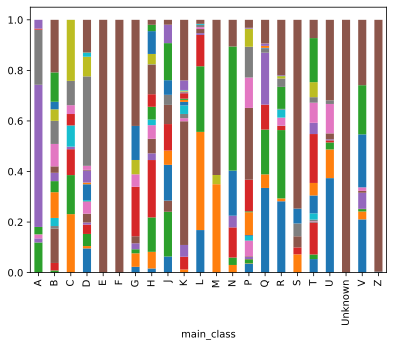

In [17]:
item_count = collection.groupby(by=['main_class', 'subclass']).n_titles.sum().unstack()
item_count.div(item_count.sum(axis=1), axis=0).plot.bar(stacked=True, legend=False)

<AxesSubplot: xlabel='main_class', ylabel='log_n_titles'>

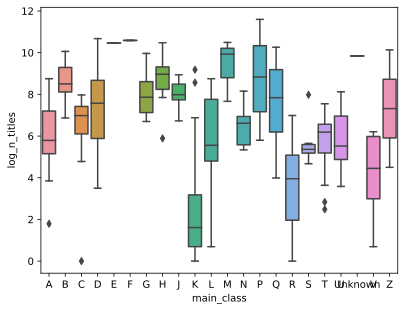

In [12]:
import seaborn as sns
import numpy as np
collection['log_n_titles'] = collection['n_titles'].transform(np.log)
sns.boxplot(data=collection, y='log_n_titles', x='main_class')

TODO:

Switch to different data, because raw number of items is politically difficult
- Use the number of books *bought*, not just currently in the *inventory*
- Electronic vs print vs location
- Circulated items per category
- Distribution of items per floor of Baker-Berry (and maybe of the other libraries)